208.13913043478306


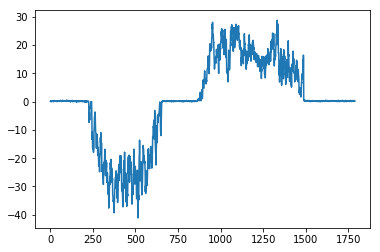

In [21]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# IMU exercise
# Copyright (c) 2015-2018 Kjeld Jensen kjen@mmmi.sdu.dk kj@kjen.dk

##### Insert initialize code below ###################

## Uncomment the file to read ##
#fileName = 'imu_razor_data_static.txt'
#fileName = 'imu_razor_data_pitch_55deg.txt'
#fileName = 'imu_razor_data_roll_65deg.txt'
fileName = 'imu_razor_data_yaw_90deg.txt'

## IMU type
#imuType = 'vectornav_vn100'
imuType = 'sparkfun_razor'

## Variables for plotting ##
showPlot = True
plotData = []
Intergration =[]

## Initialize your variables here ##
myValue = 0.0







######################################################

# import libraries
from math import pi, sqrt, atan2
import matplotlib.pyplot as plt
from math import pi, sqrt, atan2
import matplotlib.pyplot as plt
import scipy as scipy 
from scipy.signal import butter, lfilter, freqz
import numpy as np 
from scipy.signal import medfilt
from scipy.integrate import simps

# open the imu data file
f = open (fileName, "r")

# initialize variables
count = 0

order = 6
fs = 100 # sample rate, Hz
cutoff = 0


def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# looping through file

for line in f:
	count += 1

	# split the line into CSV formatted data
	line = line.replace ('*',',') # make the checkum another csv value
	csv = line.split(',')

	# keep track of the timestamps 
	ts_recv = float(csv[0])
	if count == 1: 
		ts_now = ts_recv # only the first time
	ts_prev = ts_now
	ts_now = ts_recv

	if imuType == 'sparkfun_razor':
		# import data from a SparkFun Razor IMU (SDU firmware)
		acc_x = int(csv[2]) / 1000.0 * 4 * 9.82;
		acc_y = int(csv[3]) / 1000.0 * 4 * 9.82;
		acc_z = int(csv[4]) / 1000.0 * 4 * 9.82;
		gyro_x = int(csv[5]) * 1/14.375 * pi/180.0;
		gyro_y = int(csv[6]) * 1/14.375 * pi/180.0;
		gyro_z = int(csv[7]) * 1/14.375 * pi/180.0;

	elif imuType == 'vectornav_vn100':
		# import data from a VectorNav VN-100 configured to output $VNQMR
		acc_x = float(csv[9])
		acc_y = float(csv[10])
		acc_z = float(csv[11])
		gyro_x = float(csv[12])
		gyro_y = float(csv[13])
		gyro_z = float(csv[14])
	 		
	##### Insert loop code below #########################

	# Variables available
	# ----------------------------------------------------
	# count		Current number of updates		
	# ts_prev	Time stamp at the previous update
	# ts_now	Time stamp at this update
	# acc_x		Acceleration measured along the x axis
	# acc_y		Acceleration measured along the y axis
	# acc_z		Acceleration measured along the z axis
	# gyro_x	Angular velocity measured about the x axis
	# gyro_y	Angular velocity measured about the y axis
	# gyro_z	Angular velocity measured about the z axis

	## Insert your code here ##
	
	
	
	#pitch =  acc_y / (sqrt(acc_x**2 + acc_z**2))

	#roll = (-acc_x)/acc_z 

    ## Relative angles  gyro  
	
	t0  = 0
	t1  = 1755
	

	
	myValue = gyro_z # relevant for the first exercise, then change this.

	# in order to show a plot use this function to append your value to a list:
	plotData.append (myValue*180.0/pi)
	y = butter_lowpass_filter(plotData, cutoff, fs, order)
    
	
	Intergration.append(scipy.integrate.simps(plotData ))
	######################################################

# closing the file	
Intergration = scipy.integrate.simps(plotData )



f.close()

print(Intergration)

y = medfilt(plotData, 9) 
# show the plot
if showPlot == True:
	plt.plot(plotData)
	#plt.plot(Intergration)
	plt.savefig('imu_exercise_plot.png')
	plt.show()